In [ ]:
# import requirement libraries and tools
import os
from tensorflow import keras
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style= "darkgrid", color_codes = True)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from tensorflow.keras.models import load_model
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

dataset_path = '/content/drive/MyDrive/Remake'
os.listdir(dataset_path)

Mounted at /content/drive


['Shepherd_purse_weeds', 'Bacterial', 'healthy', 'fungal']

In [ ]:

images = []
labels = []

for subfolder in os.listdir(dataset_path):

    subfolder_path = os.path.join(dataset_path, subfolder)
    if not os.path.isdir(subfolder_path):
        continue

    for image_filename in os.listdir(subfolder_path):
        image_path = os.path.join(subfolder_path, image_filename)
        images.append(image_path)

        # Store the label for the image in the labels list
        labels.append(subfolder)

df = pd.DataFrame({'image': images, 'label': labels})
df.head()

,image,label
0,/content/drive/MyDrive/Remake/Shepherd_purse_w...,Shepherd_purse_weeds
1,/content/drive/MyDrive/Remake/Shepherd_purse_w...,Shepherd_purse_weeds
2,/content/drive/MyDrive/Remake/Shepherd_purse_w...,Shepherd_purse_weeds
3,/content/drive/MyDrive/Remake/Shepherd_purse_w...,Shepherd_purse_weeds
4,/content/drive/MyDrive/Remake/Shepherd_purse_w...,Shepherd_purse_weeds


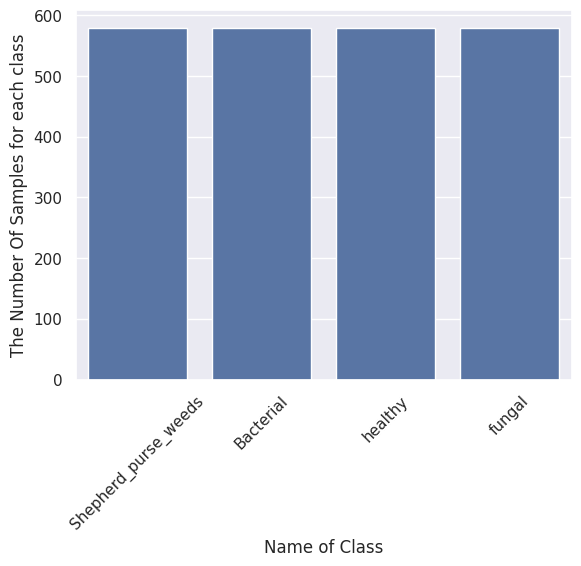

In [ ]:
ax = sns.countplot(x=df.label)

ax.set_xlabel("Name of Class")
ax.set_ylabel("The Number Of Samples for each class")

plt.xticks(rotation=45)

plt.show()

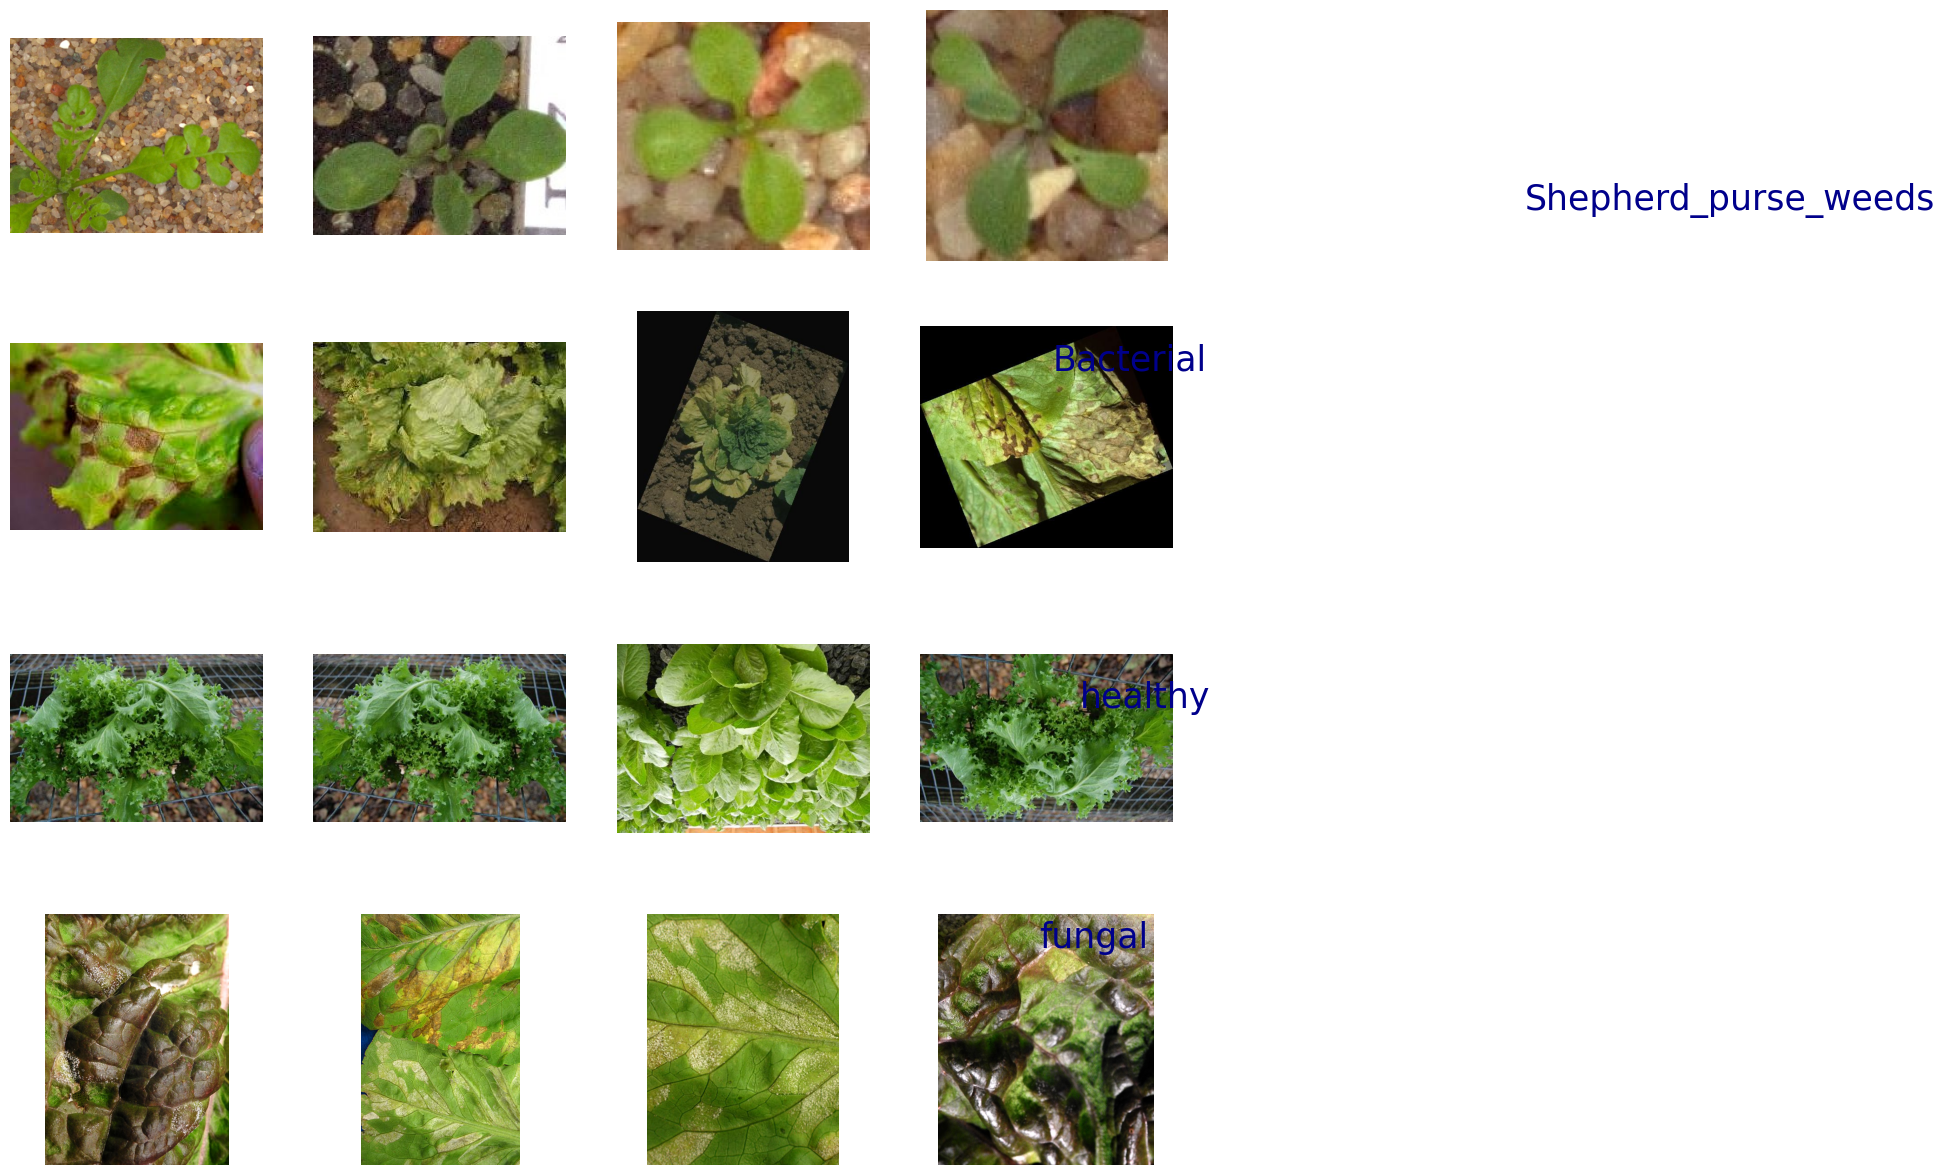

In [ ]:
from matplotlib.gridspec import GridSpec
fig = plt.figure(figsize=(15, 15))
gs = GridSpec(4, 4, figure=fig)

for i, category in enumerate(df['label'].unique()):
    filepaths = df[df['label'] == category]['image'].values[:4]

    for j, filepath in enumerate(filepaths):
        ax = fig.add_subplot(gs[i, j])
        ax.imshow(plt.imread(filepath))
        ax.axis('off')

    ax.text(300, 100, category, fontsize=25, color='darkblue')

plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df['image'], df['label'], test_size=0.2, random_state=42)

df_train = pd.DataFrame({'image': X_train, 'label': y_train})


df_test = pd.DataFrame({'image': X_test, 'label': y_test})


encoder = LabelEncoder()
y_train = encoder.fit_transform(y_train)
y_test = encoder.transform(y_test)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
image_size = (256, 256)
batch_size = 32

datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2,
    fill_mode='nearest'
)


train_generator = datagen.flow_from_dataframe(
    df_train,
    x_col='image',
    y_col='label',
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)

test_generator = datagen.flow_from_dataframe(
    df_test,
    x_col='image',
    y_col='label',
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

Found 1856 validated image filenames belonging to 4 classes.
Found 464 validated image filenames belonging to 4 classes.


In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization

model=Sequential()
model.add(Conv2D(256,(3,3),activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(4,activation='softmax'))

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 256)       │           7,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 256)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 128)       │         295,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 28, 28, 64)          │          73,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 12544)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 32)                  │         401,440 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │             132 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 925,156 (3.53 MB)

 Trainable params: 925,156 (3.53 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from tensorflow.keras.optimizers import Adam
model.compile(
    optimizer = Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
  )

In [ ]:
history = model.fit(
    train_generator,
    validation_data=test_generator,
    epochs=50)

Epoch 1/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 733s 11s/step - accuracy: 0.3025 - loss: 1.3385 - val_accuracy: 0.6228 - val_loss: 0.9617
Epoch 2/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 59s 934ms/step - accuracy: 0.6522 - loss: 0.8818 - val_accuracy: 0.5948 - val_loss: 0.9820
Epoch 3/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 62s 960ms/step - accuracy: 0.6637 - loss: 0.8127 - val_accuracy: 0.7284 - val_loss: 0.6773
Epoch 4/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 83s 984ms/step - accuracy: 0.6963 - loss: 0.7560 - val_accuracy: 0.7478 - val_loss: 0.6152
Epoch 5/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 78s 928ms/step - accuracy: 0.7452 - loss: 0.6662 - val_accuracy: 0.7931 - val_loss: 0.5477
Epoch 6/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 93s 1s/step - accuracy: 0.7590 - loss: 0.5764 - val_accuracy: 0.7823 - val_loss: 0.5330
Epoch 7/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 72s 1s/step - accuracy: 0.8036 - loss: 0.5004 - val_accuracy: 0.7802 - val_loss: 0.5307
Epoch 8/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 69s 932ms/step - accuracy: 0.8040 - loss: 0.4866 - val_accuracy: 0

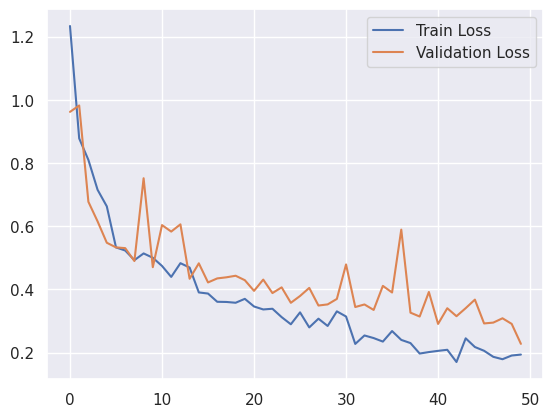

In [ ]:
plt.plot(history.history['loss'], label = 'Train Loss')
plt.plot(history.history['val_loss'], label = 'Validation Loss')
plt.legend()
plt.show()

In [ ]:
model.evaluate(test_generator)

15/15 ━━━━━━━━━━━━━━━━━━━━ 12s 792ms/step - accuracy: 0.9399 - loss: 0.2625


[0.2407294511795044, 0.9331896305084229]

In [ ]:
model.evaluate(train_generator)

58/58 ━━━━━━━━━━━━━━━━━━━━ 48s 823ms/step - accuracy: 0.9367 - loss: 0.1596


[0.14127272367477417, 0.9482758641242981]

15/15 ━━━━━━━━━━━━━━━━━━━━ 12s 713ms/step


<Figure size 1000x800 with 0 Axes>

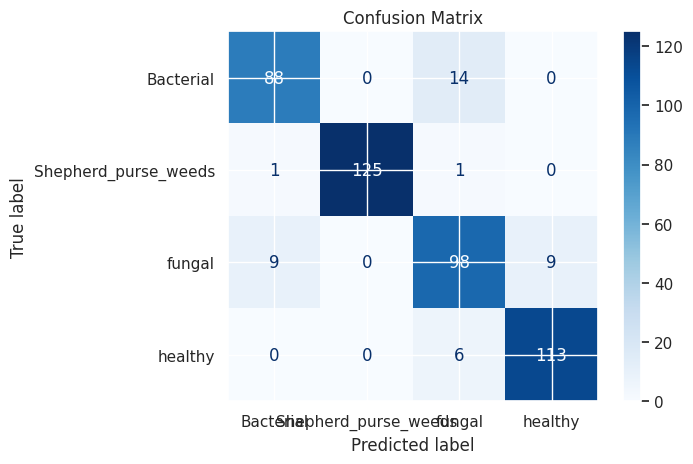

Classification Report:
                      precision    recall  f1-score   support

           Bacterial       0.90      0.86      0.88       102
Shepherd_purse_weeds       1.00      0.98      0.99       127
              fungal       0.82      0.84      0.83       116
             healthy       0.93      0.95      0.94       119

            accuracy                           0.91       464
           macro avg       0.91      0.91      0.91       464
        weighted avg       0.91      0.91      0.91       464



In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

y_pred = model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1) 

y_true = test_generator.classes

y_true_decoded = encoder.inverse_transform(y_true)
y_pred_decoded = encoder.inverse_transform(y_pred_classes)

cm = confusion_matrix(y_true, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=encoder.classes_)

plt.figure(figsize=(10, 8))
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.title('Confusion Matrix')
plt.show()

print("Classification Report:")
print(classification_report(y_true_decoded, y_pred_decoded, target_names=encoder.classes_))

In [ ]:
model.save('/content/drive/MyDrive/model50.keras')